# Clipping in GeoPandas

There are two methods for clipping data in GeoPandas.

The first one we already know about really. The intersection operator will return the intersection of two geometries and it can be applied to an entire GeoSeries.

To demonstrate this lets get the subset of raptor nests in Boulder county.  We already have seen how to do this using the within predicate which works great for getting the points that fall in a polygon.  We'll do it a different way using the intersection operator.

First lets load our county data and create a polygon for Boulder County.

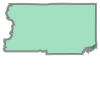

In [1]:
%matplotlib inline
import geopandas as gpd

counties = gpd.read_file("data/colorado_counties.shp")
boulder_county = counties[counties['NAMELSAD10']=='Boulder County'].unary_union
boulder_county

Next we'll load in the raptor data and plot it over boulder county

<Axes: >

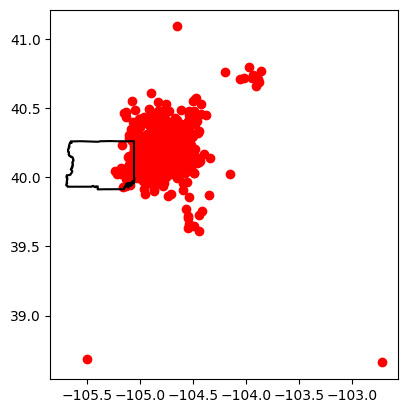

In [2]:
basemap = counties[counties['NAMELSAD10']=='Boulder County'].boundary.plot(color='k')
raptors = gpd.read_file("data/Raptor_Nests.shp")
raptors.plot(ax=basemap, color='red')

Now lets clip out just the raptor data in boulder county using the intersects predicate

<Axes: >

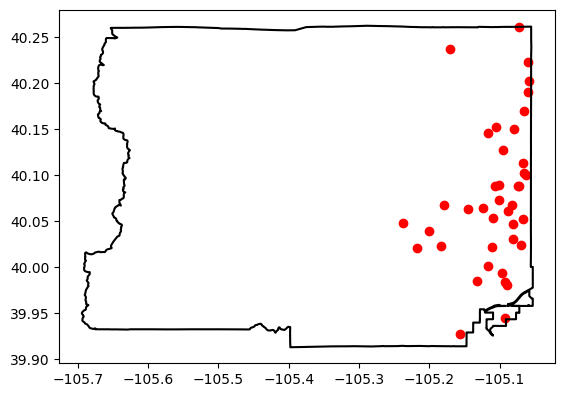

In [3]:
boulder_nests = raptors[raptors['geometry'].intersects(boulder_county)]
basemap = counties[counties['NAMELSAD10']=='Boulder County'].boundary.plot(color='k')
boulder_nests.plot(ax=basemap, color='red')

We could have used the within predicate like we did before. As long as we are getting points we would get the same result.

But we can get different results with polygons.  Lets buffer the raptor nests to turn them into polygons and plot it out again

C:\Users\merve\AppData\Local\Temp\ipykernel_8540\2056098547.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  raptors['buffer']=raptors['geometry'].buffer(0.01)


<Axes: >

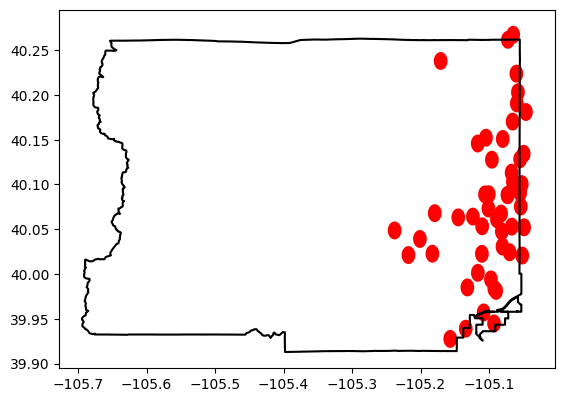

In [4]:
raptors['buffer']=raptors['geometry'].buffer(0.01)
raptors.set_geometry('buffer', inplace=True)
boulder_nests = raptors[raptors['buffer'].intersects(boulder_county)]
basemap = counties[counties['NAMELSAD10']=='Boulder County'].boundary.plot(color='k')
boulder_nests.plot(ax=basemap, color='red')

Lets ignore for now, the fact that I buffered on a geographic CRS so I ended up with weird oval buffers. We'll see that we actually have a few extra nests that aren't even in Boulder county because they are close enough that their buffers intersect with Boulder county.

Lets try it again with the within predicate.

<Axes: >

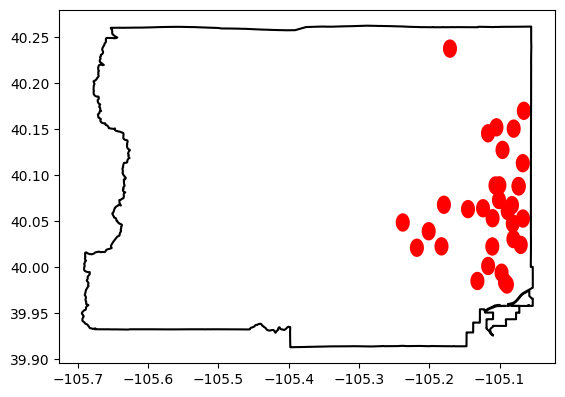

In [5]:
boulder_nests = raptors[raptors['buffer'].within(boulder_county)]
basemap = counties[counties['NAMELSAD10']=='Boulder County'].boundary.plot(color='k')
boulder_nests.plot(ax=basemap, color='red')

Now we see that we have a lot less nests because we are not including nests that are within Boulder county but whose buffers cross the county line.

This is still not what we want.  We want all the nests that are in Boulder County but only the part of the buffers that are inside the county limits.

To do this we need to clip the buffers to the county polygon.

<Axes: >

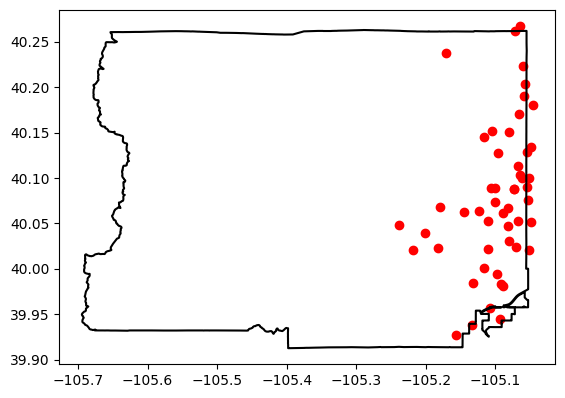

In [6]:
boulder_nests = gpd.clip(raptors, counties[counties['NAMELSAD10']=='Boulder County'])
basemap = counties[counties['NAMELSAD10']=='Boulder County'].boundary.plot(color='k')
boulder_nests['geometry'].plot(ax=basemap, color='red')

And that is exactly what we get with the clip method.  All the nests within Boulder county with their buffers clipped at the county line.  Note that the data frame that is returned no longer has a point geometry. Instead the geometry column contains the clipped buffers and it retains the full buffer geometry in the 'buffer' GeoSeries.

If it is important that you retain the original point you can either take the centroid of the buffer or create another column that is NOT named 'geometry' that is a duplicate of the point data.

In [7]:
boulder_nests

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry,buffer
849,886.0,39.988339,-105.067373,2015-06-11,Swainsons Hawk,ACTIVE NEST,886,POINT (-105.15664 39.92748),"POLYGON ((-105.14707 39.92458, -105.14740 39.9..."
807,843.0,40.007517,-105.119596,2015-02-20,Red-tail Hawk,INACTIVE NEST,843,POINT (-105.13401 39.93887),"POLYGON ((-105.13784 39.92963, -105.13872 39.9..."
810,846.0,40.009698,-105.113618,2015-02-20,Swainsons Hawk,INACTIVE NEST,846,POINT (-105.09268 39.94469),"POLYGON ((-105.08273 39.94371, -105.08279 39.9..."
737,773.0,40.022134,-105.025090,2014-09-18,Swainsons Hawk,ACTIVE NEST,773,POINT (-105.10787 39.95702),"POLYGON ((-105.09792 39.95604, -105.09806 39.9..."
809,845.0,40.010111,-105.121219,2015-02-20,Red-tail Hawk,FLEDGED NEST,845,POINT (-105.08961 39.98107),"POLYGON ((-105.07966 39.98009, -105.07980 39.9..."
375,379.0,40.052378,-105.056543,2012-03-28,Swainsons Hawk,FLEDGED NEST,379,POINT (-105.09226 39.98344),"POLYGON ((-105.08231 39.98246, -105.08245 39.9..."
767,803.0,40.051657,-105.150116,2014-12-10,Swainsons Hawk,ACTIVE NEST,803,POINT (-105.13160 39.98494),"POLYGON ((-105.12165 39.98396, -105.12179 39.9..."
850,887.0,39.986753,-105.067144,2015-06-11,Swainsons Hawk,INACTIVE NEST,887,POINT (-105.09720 39.99392),"POLYGON ((-105.08725 39.99294, -105.08739 39.9..."
377,381.0,40.061601,-105.070819,2012-04-02,Red-tail Hawk,INACTIVE NEST,381,POINT (-105.11632 40.00126),"POLYGON ((-105.10637 40.00028, -105.10651 39.9..."
766,802.0,40.052003,-105.144326,2014-12-10,Red-tail Hawk,INACTIVE NEST,802,POINT (-105.05153 40.02054),"POLYGON ((-105.05624 40.01172, -105.05709 40.0..."
